**HOUSE PRICE DETECTION**


House price prediction model is used to predict house price with the help of the Regression(Supervised Machine Learning)techinique. This technique works on the equation y=mx+c, where Y is the dependent variable and which is the *House Price* and X is the independent value which is like example area, size of the house. 
So here I have used linear regression (which is mainly used for displaying this model). I have also used tensorflow techniques like keras to plot the  model and show more clear and deep layer wise discription in the form of graphs and images.

**Importing libraries**

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, MinMaxScaler
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error
from sklearn.linear_model import LinearRegression
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
#from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.datasets import make_regression
import scikeras
from scikeras.wrappers import KerasRegressor
from keras.utils import plot_model

# Warnings
import warnings
warnings.filterwarnings('ignore')

**Reading and loading csv file**

In [131]:
house_price = pd.read_csv("Housing.csv")
house_price

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


*Defining the dataset*

In [132]:
# print the top 5 rows and columns

house_price.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [133]:
house_price.shape

(545, 13)

In [134]:
house_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [135]:
house_price.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [136]:
house_price.isnull().sum()

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

In [137]:
'''hp = house_price['price']/1000000

plt.figure(figsize=(10,6))
plt.hist(hp, bins = 20, color = 'red', edgecolor ='black')
plt.title('Distribution of House Prices')
plt.xlabel('Price(Million)')
plt.ylabel('Number of houses sold')
plt.grid(axis ='y', linestyle = '--', alpha = 0.7)
plt.show()'''

"hp = house_price['price']/1000000\n\nplt.figure(figsize=(10,6))\nplt.hist(hp, bins = 20, color = 'red', edgecolor ='black')\nplt.title('Distribution of House Prices')\nplt.xlabel('Price(Million)')\nplt.ylabel('Number of houses sold')\nplt.grid(axis ='y', linestyle = '--', alpha = 0.7)\nplt.show()"

In [138]:
'''house_price['price']/=1000000

plt.figure(figsize =(10,6))
plt.bar(house_price['bedrooms'], house_price['price'], alpha=1, color='yellow')
plt.title('Number pf bedrooms vs sales price')
plt.xlabel('Number of bedrooms')
plt.ylabel('Sale price (in Million)')
plt.grid(axis='y', linestyle = '--', alpha=0.7)
plt.show()'''


"house_price['price']/=1000000\n\nplt.figure(figsize =(10,6))\nplt.bar(house_price['bedrooms'], house_price['price'], alpha=1, color='yellow')\nplt.title('Number pf bedrooms vs sales price')\nplt.xlabel('Number of bedrooms')\nplt.ylabel('Sale price (in Million)')\nplt.grid(axis='y', linestyle = '--', alpha=0.7)\nplt.show()"

**Exploratory Data Analysis**

In [139]:
num_col = ['price','area']

cat_col = ['bedrooms','bathrooms','stories','mainroad','guestroom','basement',
           'hotwaterheating','airconditioning','parking','prefarea','furnishingstatus']

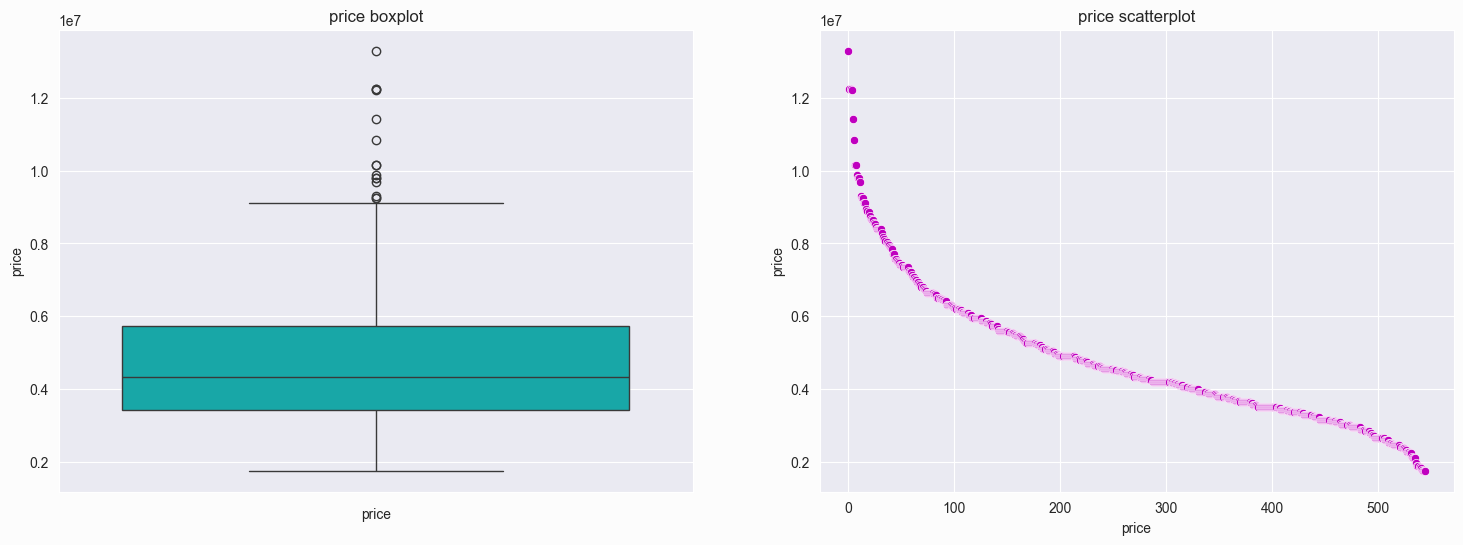

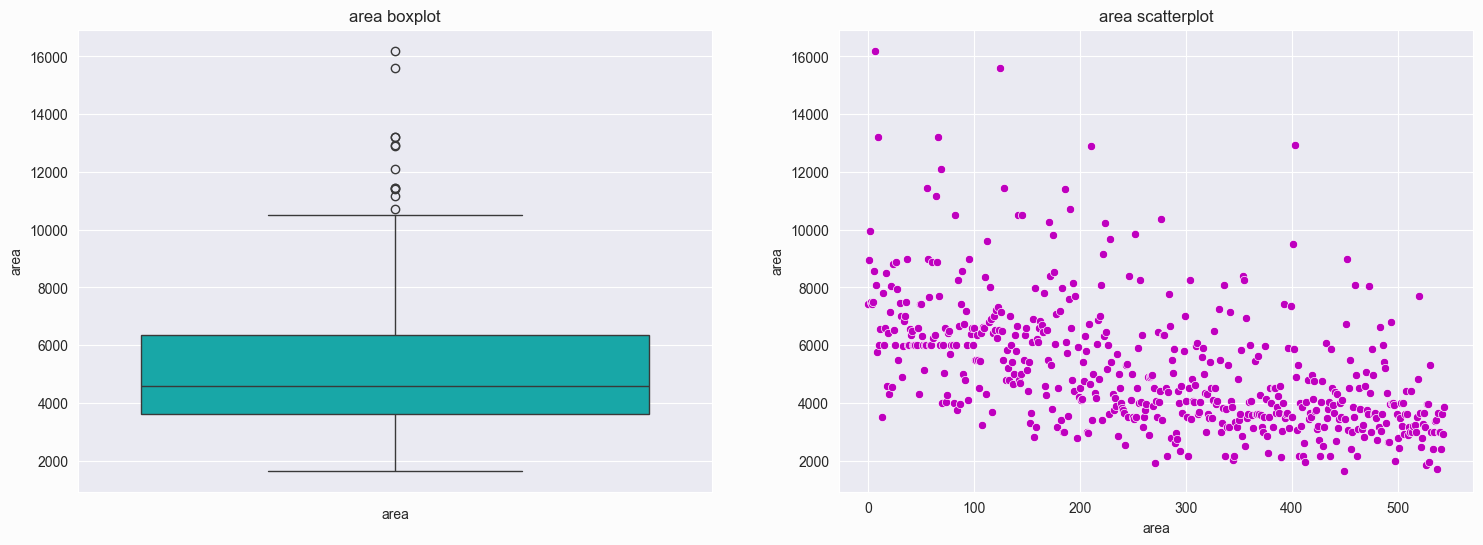

In [140]:
sns.set_style('darkgrid')
for feat in num_col:
    
    plt.figure(figsize=(18,6),edgecolor= 'blue',facecolor= '#FCFCFC')
    ax1 = plt.subplot(1,2,1)
    sns.boxplot(house_price[feat],color='c')  #Boxplot
    plt.title(feat + ' boxplot')      # plot title
    plt.xlabel(feat,fontsize=10)      # X-axis label
    
    print('\n')
    
    ax2 = plt.subplot(1,2,2) 
    sns.scatterplot(house_price[feat],color='m') #Scatterplot
    plt.title(feat + ' scatterplot')       # plot title
    plt.xlabel(feat,fontsize=10)            # X-axis label
    plt.show()

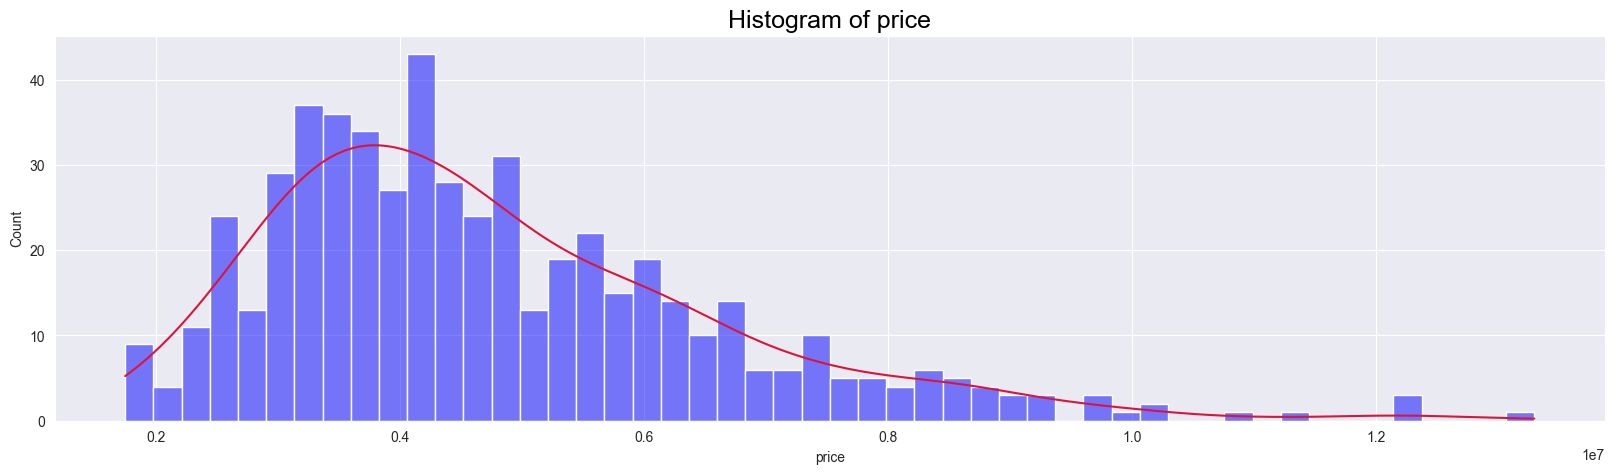

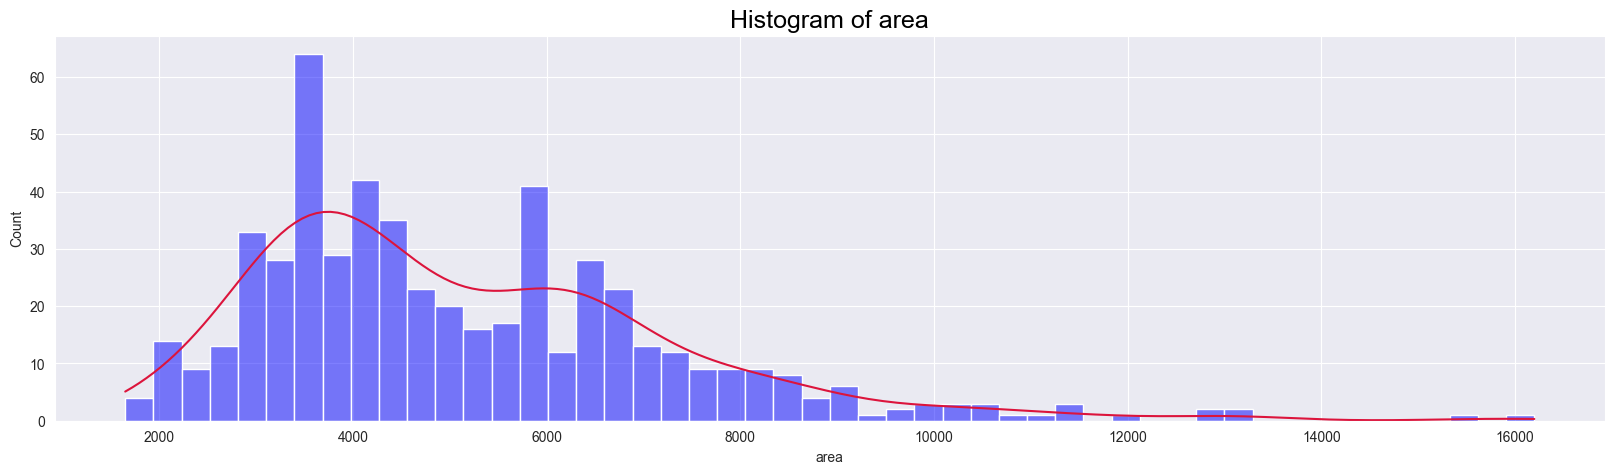

In [141]:
# Plot numerical columns

for i in num_col:
    plt.figure(figsize=(20,5))
    ax= sns.histplot(data = house_price, x=i, bins = 50, kde = True, color = 'blue')
    ax.lines[0].set_color("crimson")
    plt.title(f'Histogram of {i}', fontdict={'size':18, 'color':'black'})
    plt.show()

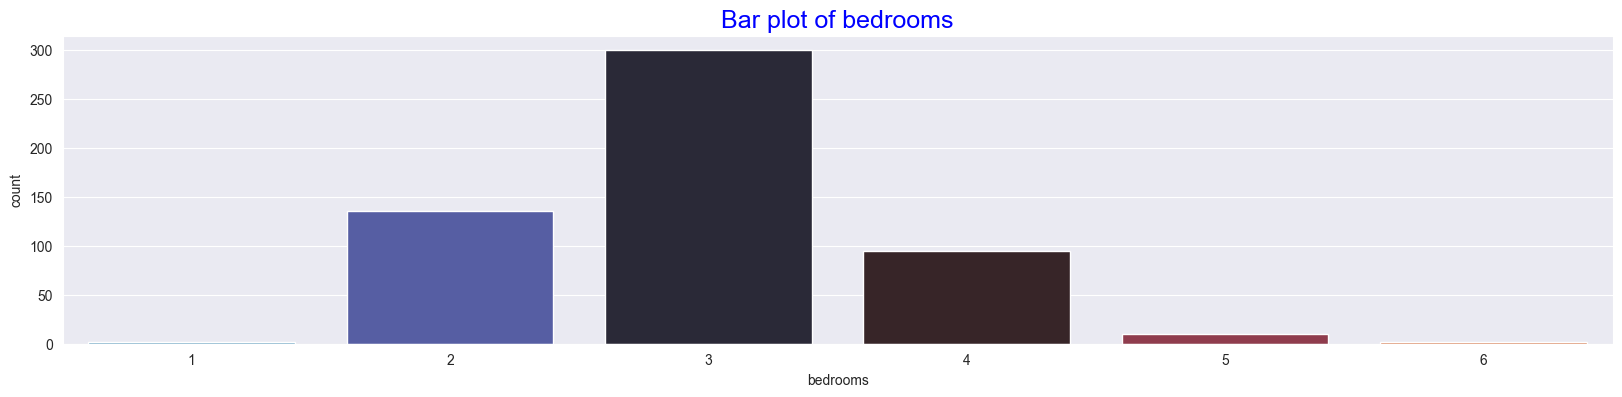

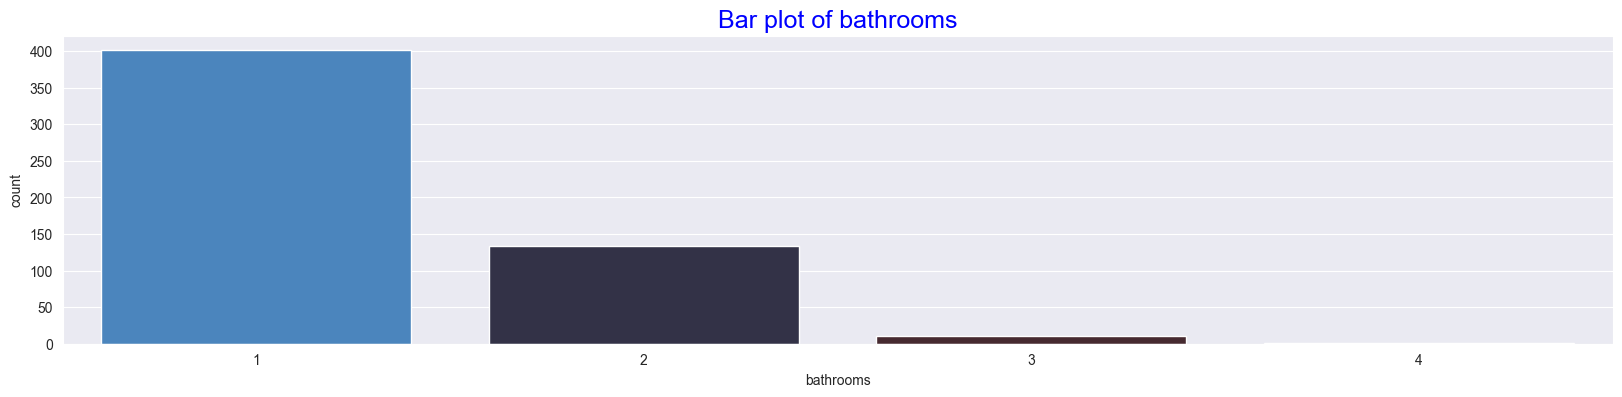

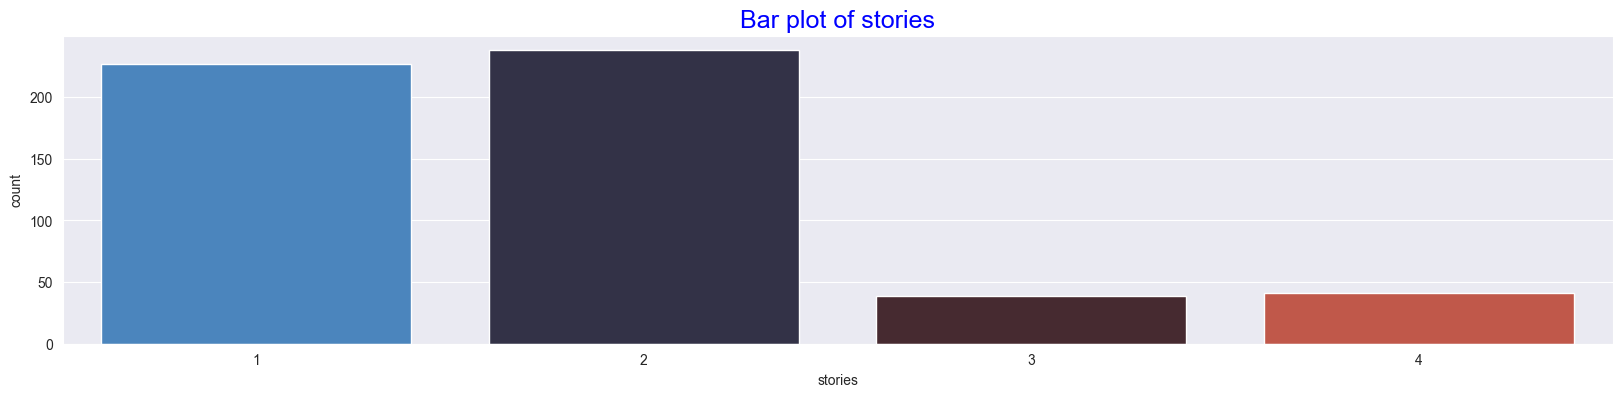

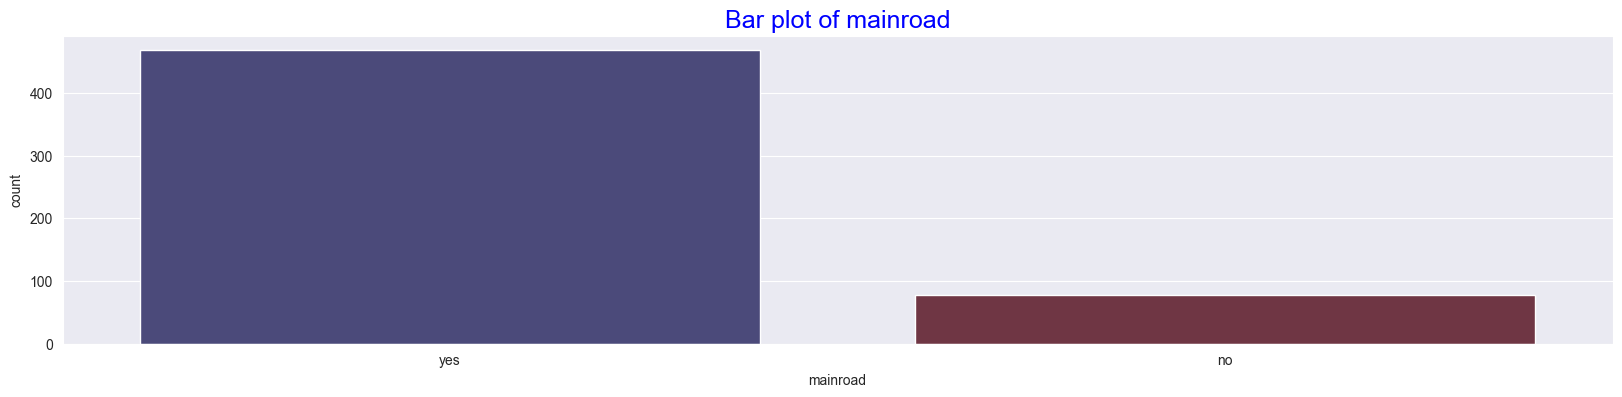

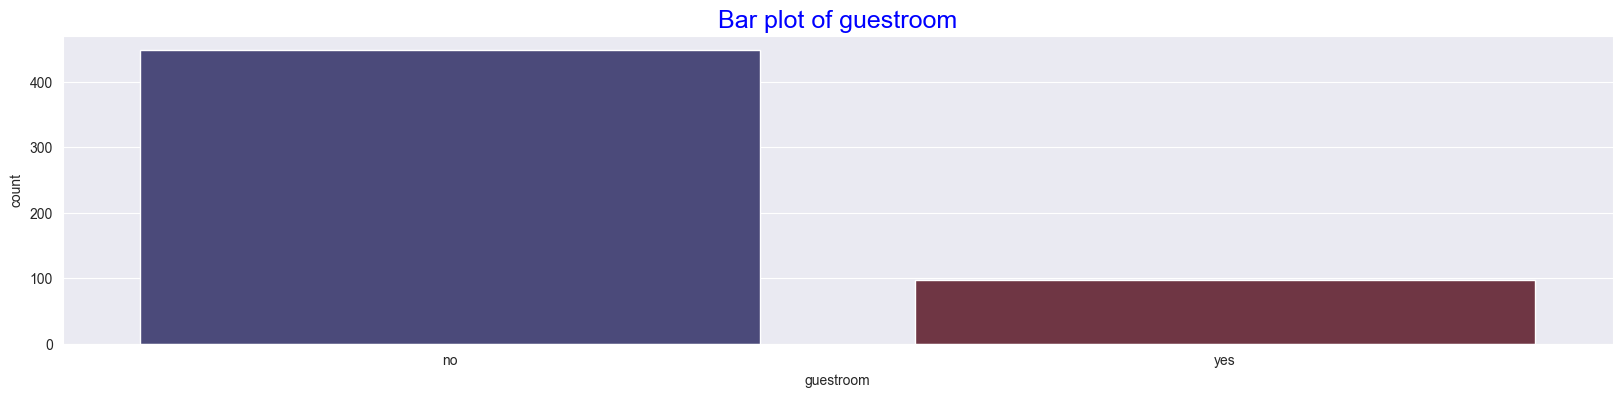

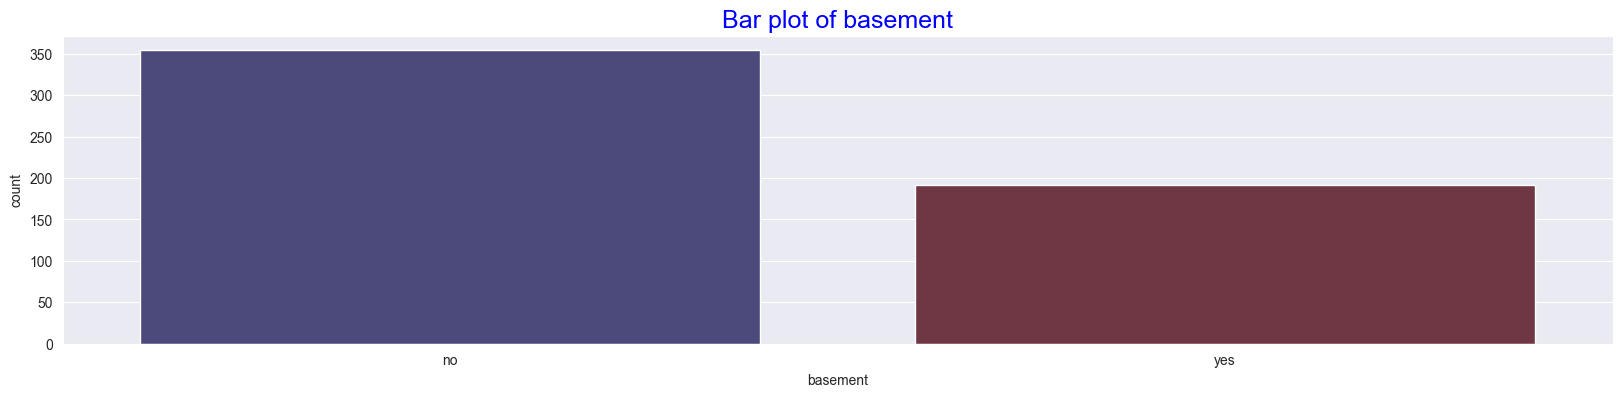

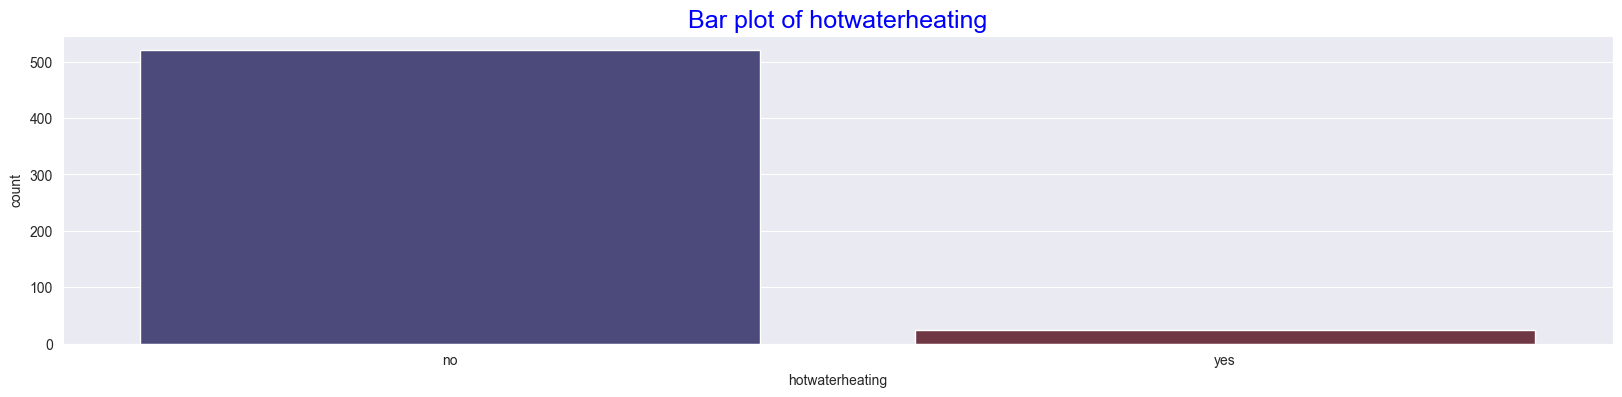

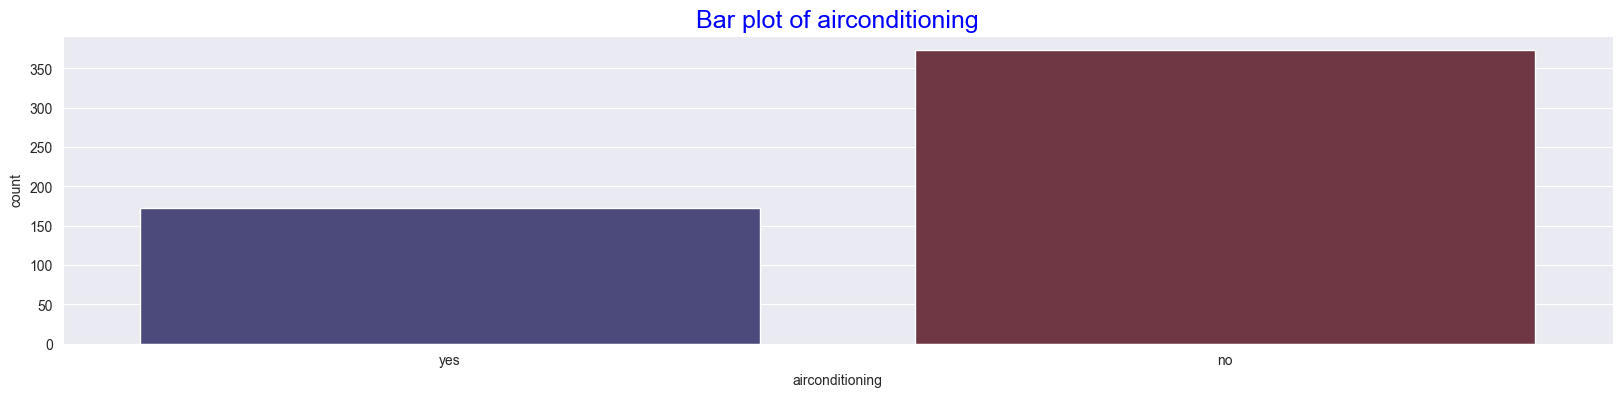

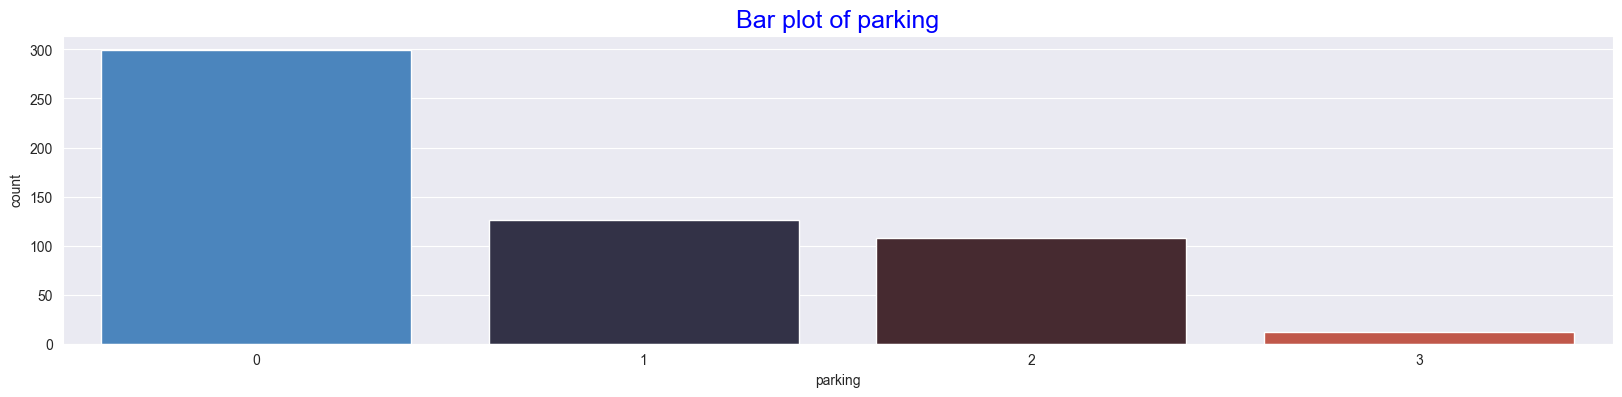

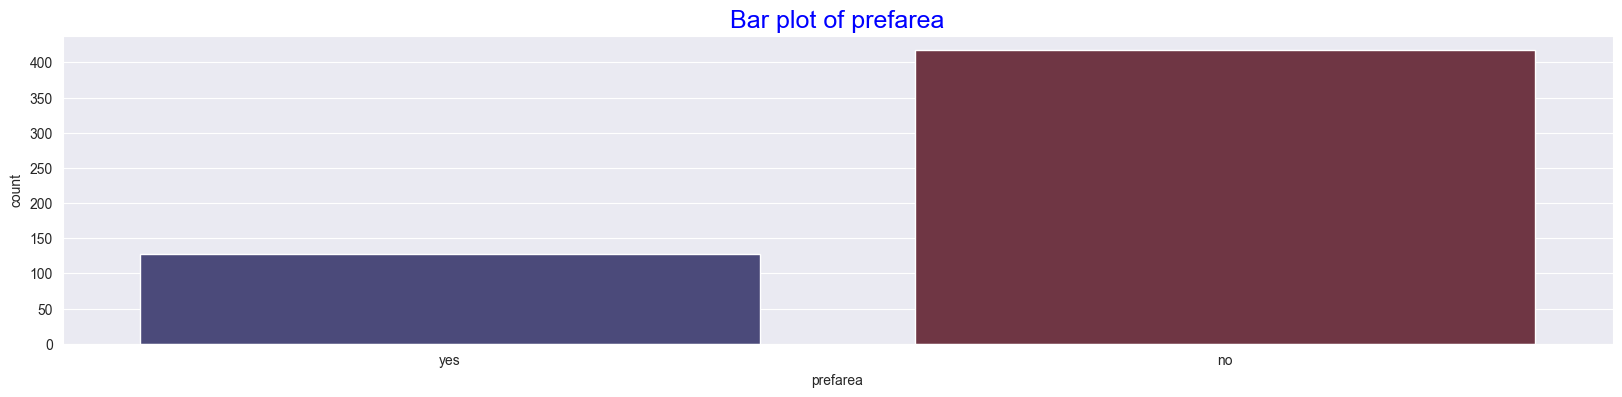

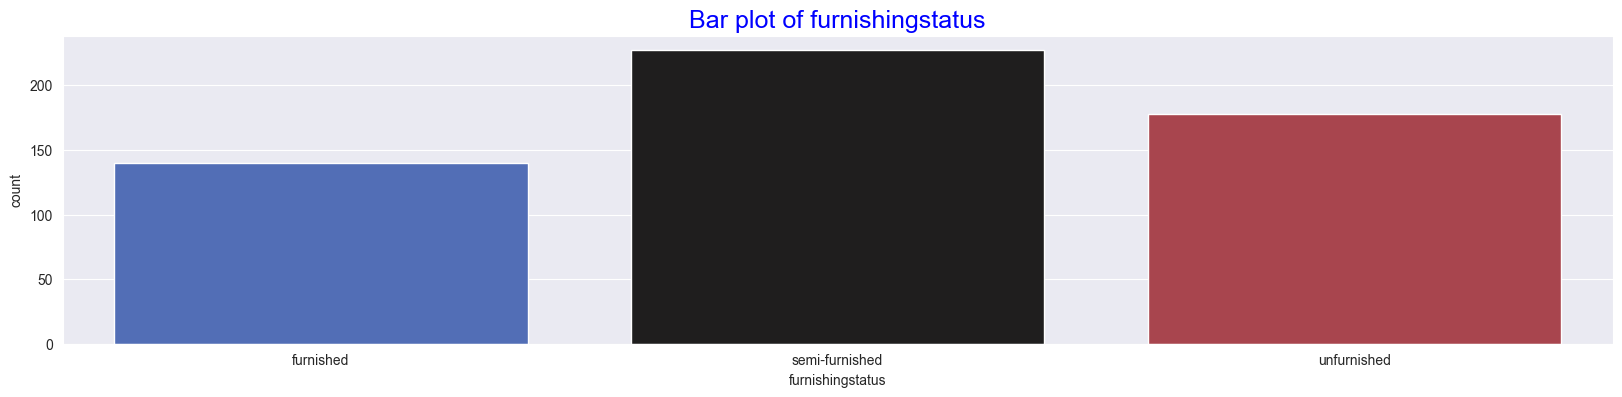

In [142]:
for i in cat_col:
    plt.figure(figsize=(20,4))
    sns.countplot(data=house_price, x=i, palette='icefire')
    plt.title(f'Bar plot of {i}', fontdict = {'size': 18, 'color':'Blue'})
    plt.show()

*Feature Engineering*

**Removing Outliers**

In [143]:
house_price.drop(index= house_price[house_price.price>10000000].index, inplace=True)

In [144]:
X = house_price.drop(columns='price')
Y = house_price['price']/10000000      #dividing the price for normalization

feature_num = X.select_dtypes(exclude='object').columns
feature_cat = X.select_dtypes(include='object').columns

*Preprocessing*

In [145]:
preprocessor = make_column_transformer((MinMaxScaler(),feature_num),
                                       (OneHotEncoder(handle_unknown='ignore'),feature_cat))

*Train Test Split*

In [146]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [147]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [148]:
X_train.shape

(375, 20)

*Deep Learning Model*

**Model Layers**

In [149]:
# Define Model layers
model = keras.Sequential([# Input Layer
                          layers.Dense(units=20, activation='relu', input_dim=X_train.shape[1]),
    
                          # Hidden Layers
                          layers.Dense(500,activation='relu'),   
                          layers.Dense(500,activation='relu'),
                          layers.Dense(500,activation='relu'),
    
                          # Output Layer
                          layers.Dense(1),
                         ])


# optimizer and loss for model
model.compile(optimizer='adam',
              loss='mae',
              metrics=[tf.keras.metrics.RootMeanSquaredError()]
              )


# Early stopper to stop the epochs
early_stoping = keras.callbacks.EarlyStopping(patience=20,
                                              min_delta=0.001,
                                              restore_best_weights=True,
                                             )

In [150]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_20 (Dense)                │ (None, 20)             │           420 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 500)            │        10,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_22 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_23 (Dense)                │ (None, 500)            │       250,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_24 (Dense)                │ (None, 1)              │           501 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 512,421 (1.95 MB)

 Trainable params: 512,421 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [151]:
# fit the model
hp = model.fit(X_train,y_train,
                      validation_data=(X_test,y_test),  # validation data
                      batch_size = 128,                 # number of inputs for optimizer
                      epochs = 400,                     # number of iteration
                      callbacks=[early_stoping],        # callback to stop iteration when val loss stops decreasing
                      verbose = 0
                      )

**Loss Plots**

In [152]:
error = pd.DataFrame(hp.history)

<Axes: title={'center': 'RMSE Loss'}>

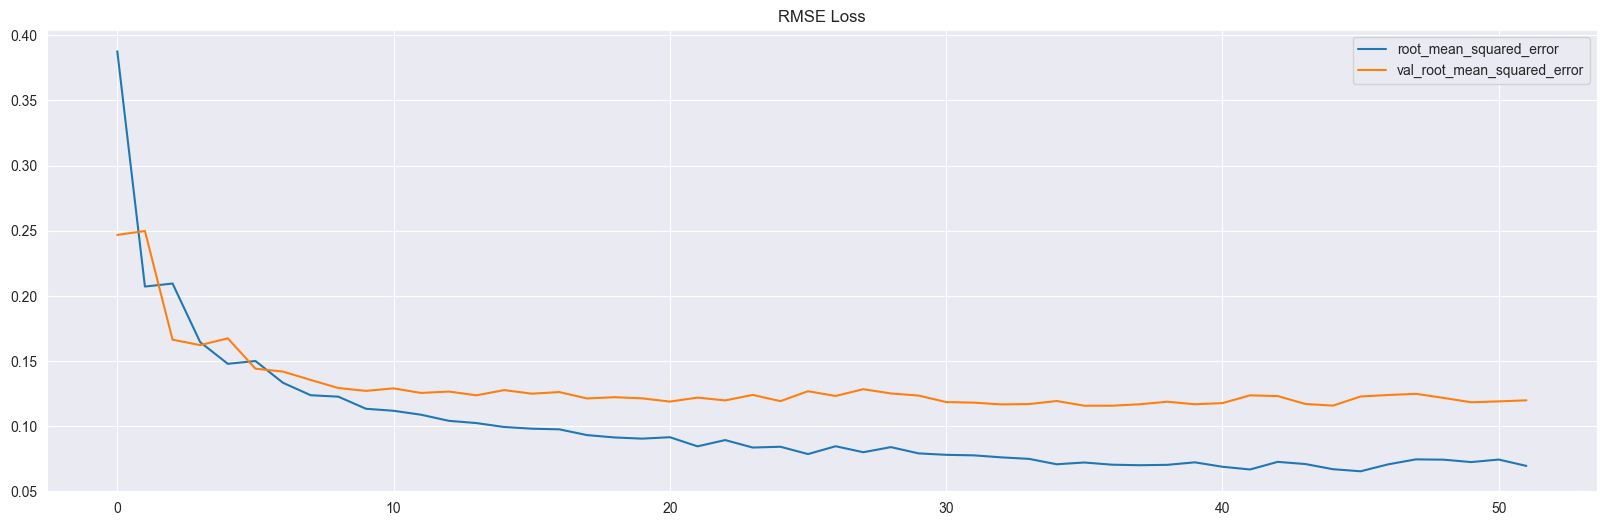

In [153]:
error.loc[:, ['root_mean_squared_error','val_root_mean_squared_error',]].plot(title="RMSE Loss",figsize=(20,6))

<Axes: title={'center': 'MAE Loss'}>

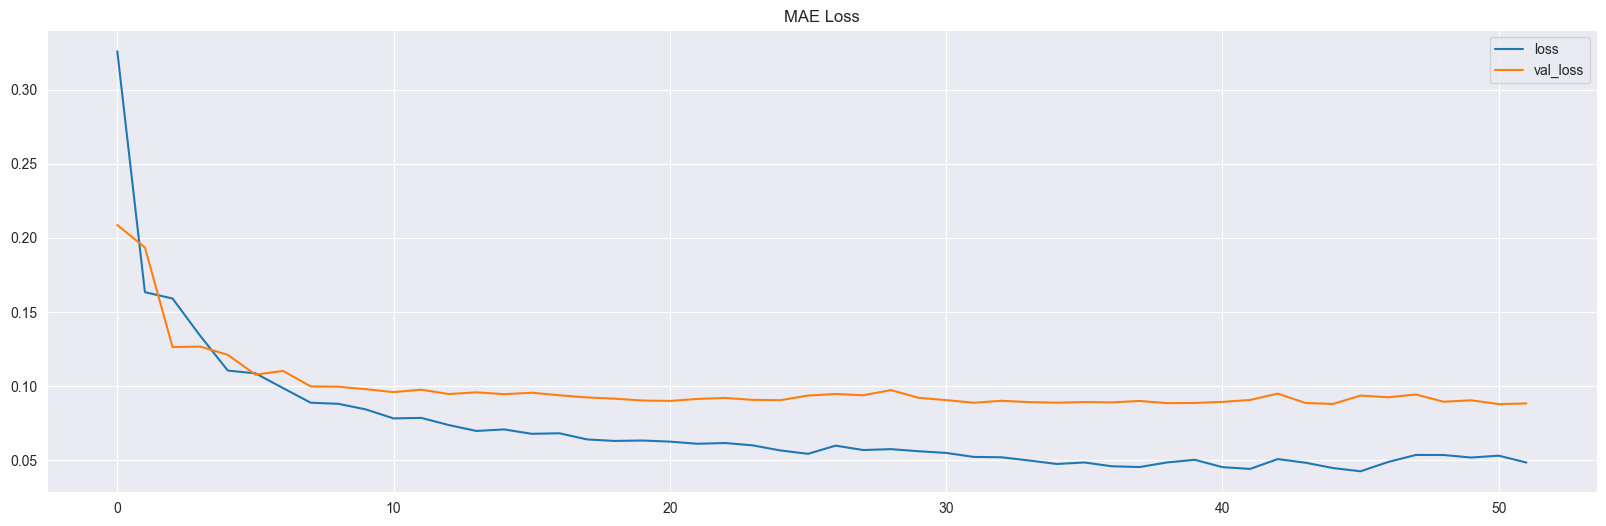

In [154]:
error.loc[:, ['loss','val_loss',]].plot(title="MAE Loss",figsize=(20,6))

**Prediction**

In [155]:
pred_train= model.predict(X_train)
print('RMSE of train data:',np.sqrt(mean_squared_error(y_train,pred_train)))

pred= model.predict(X_test)
print('RMSE of test data:',np.sqrt(mean_squared_error(y_test,pred)))

12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step
RMSE of train data: 0.07577761837984817
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
RMSE of test data: 0.11814024060763957


Text(0, 0.5, 'Predicted Price')

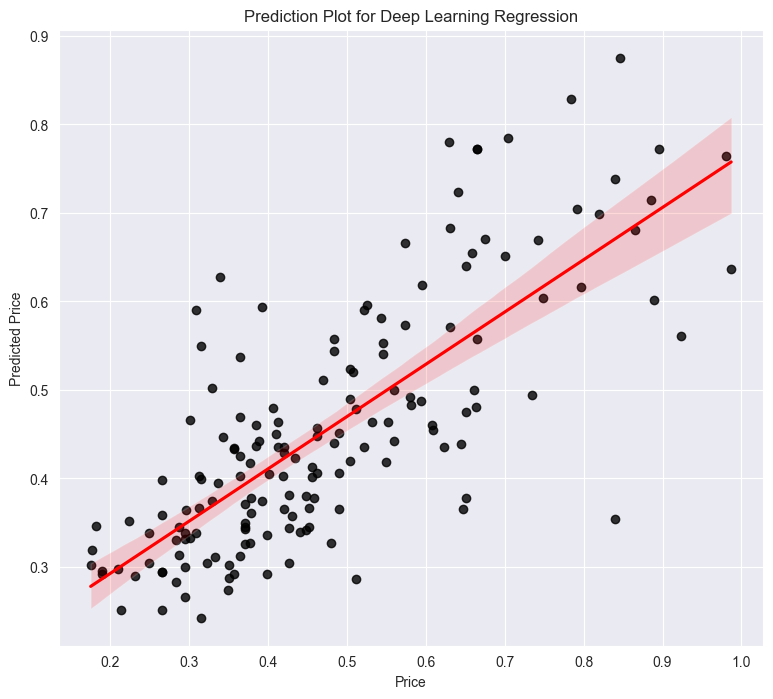

In [156]:
plt.figure(figsize=(20,8))
# Prediction plot
ax1 = plt.subplot(1,2,1)
sns.regplot(data=house_price, x=y_test, y=pred, scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

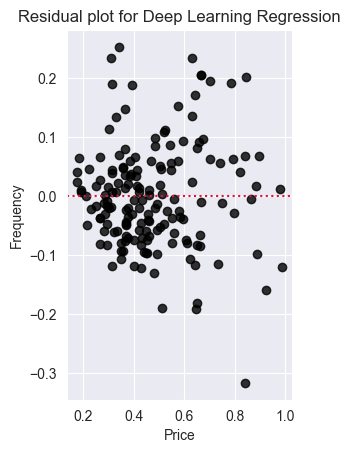

In [157]:
#Residual plot   
ax2 = plt.subplot(1,2,2) 
ax=sns.residplot(data= Y,x=y_test,y=pred,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Deep Learning Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.show()

Machine Learning Model

In [158]:
lr = LinearRegression()

lr.fit(X_train,y_train)

pred_train= lr.predict(X_train)
rmse_train_lr=np.sqrt(mean_squared_error(y_train,pred_train))
print('RMSE of train data',rmse_train_lr)

pred = lr.predict(X_test)
rmse_test_lr = np.sqrt(mean_squared_error(y_test,pred))
print('RMSE of test data',rmse_test_lr)


RMSE of train data 0.0946568306549616
RMSE of test data 0.1016333207973604


Text(0, 0.5, 'Predicted Price')

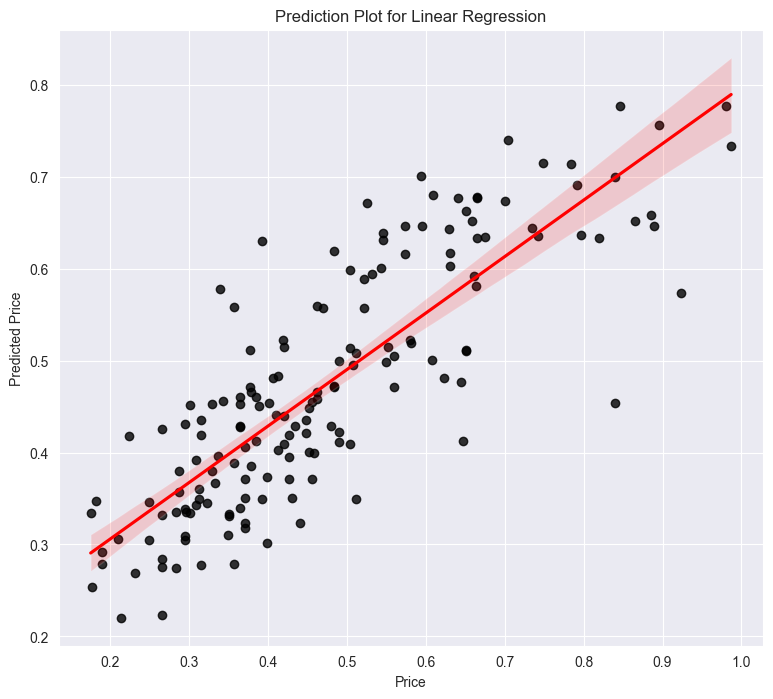

In [159]:
# prediction plot

plt.figure(figsize=(20,8))
ax1 = plt.subplot(1,2,1)
sns.regplot(data=house_price,x=y_test,y=pred ,scatter_kws={"color": "black"}, line_kws={"color": "red"})
plt.title('Prediction Plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Predicted Price')

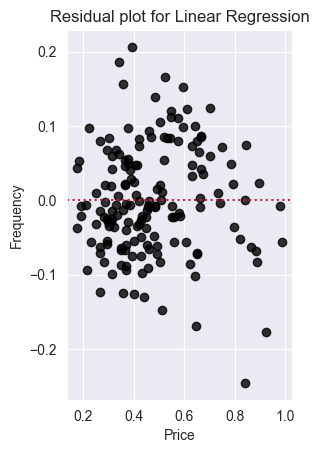

In [160]:
#Residual plot   
ax2 = plt.subplot(1,2,2) 
ax=sns.residplot(data= Y,x=y_test,y=pred,color='black')
ax.lines[0].set_color('crimson')
plt.title('Residual plot for Linear Regression')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

Conslusion

Deep Learning model performs better than Linear Regression as RMSE of the deep learning model is smaller than the machine learning model.